# Compute universal thermal climate index (UTCI) on climate model data

[![Foo](http://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/larsbuntemeyer/pythermalcomfort/utci-notebook?urlpath=lab%2Ftree%2Fexamples%2Fclimate-model-input.ipynb)

In [3]:
from pythermalcomfort import models
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

We load CMIP6 climate model data from [ESGF-CEDA](https://esgf-index1.ceda.ac.uk/projects/esgf-ceda/) input via opendap:

In [13]:
tdb = xr.open_dataset("http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gn/v20190710/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc")#
v = xr.open_dataset("http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/sfcWind/gn/v20190710/sfcWind_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc")
rh = xr.open_dataset("http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/hurs/gn/v20190815/hurs_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc")
tr = tdb

We wrap the `utci` function to keep the meta information and attributes of the input data:

In [14]:
def xutci(tbr, tr, v, rh):
    return xr.apply_ufunc(
        models.utci,
        tbr,
        tr,
        v,
        rh,
    ).rename('utci')

In [15]:
%time utci = xutci(tdb.tas-273.5, tr.tas-273.5, v.sfcWind, rh.hurs)

CPU times: user 1.62 s, sys: 69 ms, total: 1.69 s
Wall time: 1.69 s


Let's have a quick look...

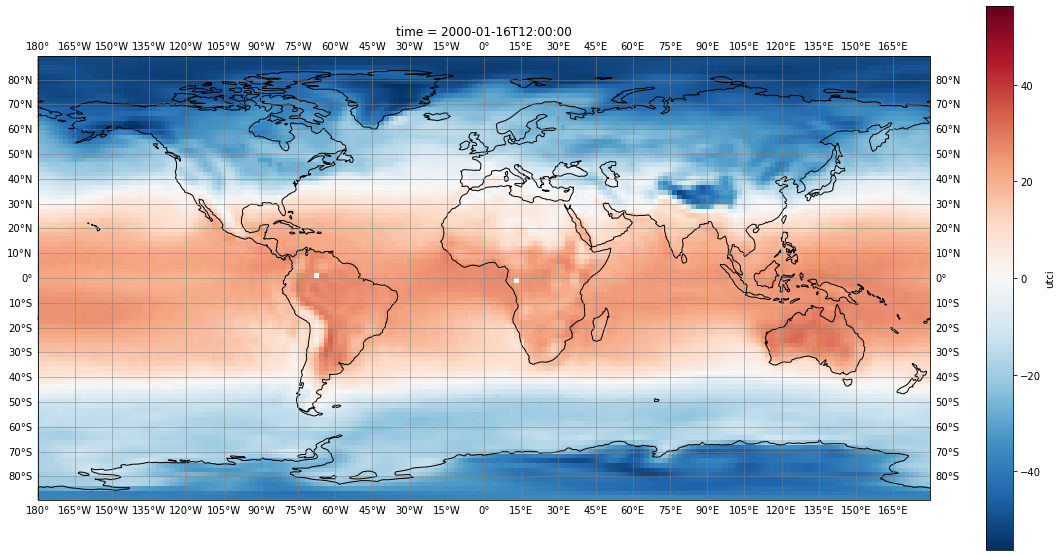

In [9]:
plt.figure(figsize=(20,10))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
             xlocs=range(-180,180,15), ylocs=range(-90,90,10))
ax.coastlines()
utci.sel(time="2000-01").plot(ax=ax)

We can also look more closely into the seasonal mean:

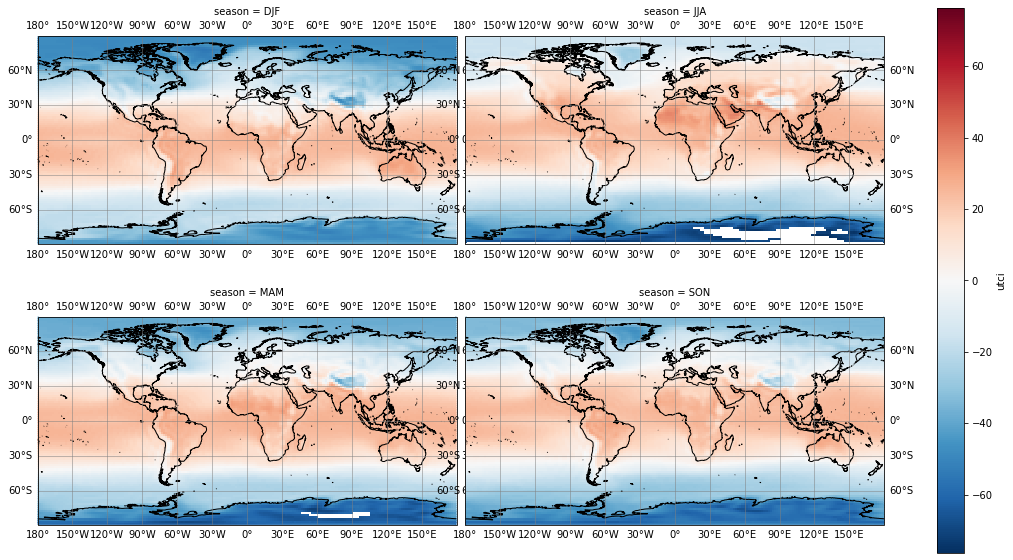

In [10]:
p = utci.groupby('time.season').mean().plot(col='season', col_wrap=2,
                                            transform=ccrs.PlateCarree(), 
                                            subplot_kws={"projection": ccrs.PlateCarree()},
                                            figsize=(15,8))
for ax in p.axes.flat:
    ax.coastlines(resolution='50m')
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
             xlocs=range(-180,180,30), ylocs=range(-90,90,30))